# Problem Set 2

In [1]:
import numpy as np
import scipy as sp
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from scipy.io import loadmat
import matplotlib.tri as tri
import matplotlib.pyplot as plt

## Load and plot the grids

In [2]:
grids = loadmat('FE_grid.mat',simplify_cells=True)
print(grids.keys())
coarse_grid = grids['FE_grid']['coarse']
# show the keys in the grid
print(coarse_grid.keys())
print("number of nodes:",coarse_grid['nodes'])
print("number of elements:",coarse_grid['elements'])
x=coarse_grid['coor'][:,0]
y=coarse_grid['coor'][:,1]
z=np.sin(np.pi*x)*np.cos(np.pi*y)
# be careful  the indices must start at 0, in mat files they start at one, so substract 1
triangles=np.concatenate(coarse_grid['theta'][0:5]-1)
T=tri.Triangulation(x,y,triangles)


dict_keys(['__header__', '__version__', '__globals__', 'FE_grid'])
dict_keys(['nodes', 'coor', 'elements', 'theta'])
number of nodes: 1333
number of elements: 2095


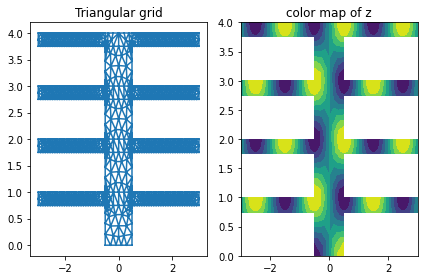

In [3]:
def plot(mesh,u):
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs = axs.flatten()

    # Plot the triangulation.
    axs[0].triplot(mesh)
    axs[0].set_title('Triangular grid')

    # Plot the color map.
    axs[1].tricontourf(mesh,u)
    axs[1].set_title('color map of z')
    fig.tight_layout()
    plt.show()
plot(T,z)


# Load the matrices

In [4]:
M = loadmat('FE_matrix.mat',simplify_cells=True)
Aq_coarse=M['FE_matrix']['coarse']['Ahq']
Fh_coarse=M['FE_matrix']['coarse']['Fh']

## Solve the finite element problem

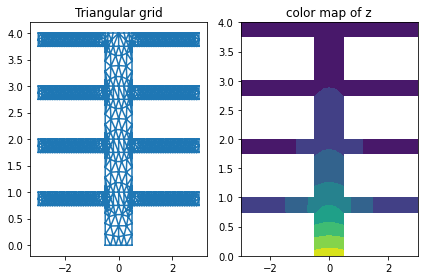

In [6]:
def assembleA(mu,Aq):
    A=csc_matrix(Aq[0])
    for k in range(0,6):
        A+=mu[k]*Aq[k]
    return A
k_i=1
Bi=0.1
mu=np.array([k_i,k_i, k_i, k_i, 1, Bi])
A=assembleA(mu,Aq_coarse)
u = spsolve(A, Fh_coarse)
plot(T,u)